In [1]:
import risk_kit_Shashwat as rk
import numpy as np
import pandas as pd

In [2]:
stock1 = pd.read_csv(r"ACC_NS.csv")
stock2 = pd.read_csv(r"ASIANPAINT_NS.csv")
stock3 = pd.read_csv(r"ASHOKLEY_NS.csv")
stock4 = pd.read_csv(r"ATUL_NS.csv")
stock5 = pd.read_csv(r"AUROPHARMA_NS.csv")
stock6 = pd.read_csv(r"BANKBARODA_NS.csv")
stock7 = pd.read_csv(r"BRITANNIA_NS.csv")
stock8 = pd.read_csv(r"DRREDDY_NS.csv")
stock9 = pd.read_csv(r"ITC_NS.csv")
stock10 = pd.read_csv(r"TCS_NS.csv")

In [3]:
portfolio = [stock1, stock2, stock3, stock4, stock5, stock6, stock7, stock8, stock9, stock10]
stock_name=['ACC','Asian Paint','Ashok Leyland','Atul','Auropharma','Bank of Baroda','Britannia','Dr Reddy','ITC','TCS']

In [4]:
stock1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-07-01,525.500000,604.200012,461.299988,583.400024,435.962799,13246615
1,2008-08-01,575.000000,651.000000,541.099976,562.349976,427.456085,7333460
2,2008-09-01,555.000000,634.900024,551.299988,614.950012,467.438599,7735564
3,2008-10-01,619.000000,649.000000,365.000000,493.750000,375.311554,5891752
4,2008-11-01,519.000000,532.900024,381.100006,405.600006,308.306519,7440072
...,...,...,...,...,...,...,...
176,2023-03-01,1739.699951,1932.300049,1592.349976,1667.199951,1667.199951,15402177
177,2023-04-01,1675.000000,1789.000000,1651.599976,1762.849976,1762.849976,7684601
178,2023-05-01,1762.849976,1867.000000,1704.449951,1777.199951,1777.199951,15329218
179,2023-06-01,1782.000000,1823.699951,1780.699951,1815.599976,1815.599976,1361976


In [5]:
drop_col = stock1.columns.values.tolist()
drop_col.remove('Date')
drop_col.remove('Close')
drop_col

['Open', 'High', 'Low', 'Adj Close', 'Volume']

In [6]:
for st in portfolio:
    st.drop(drop_col,axis=1,inplace=True)

In [7]:
stock1.drop(180,inplace=True)
stock2.drop(180,inplace=True)
stock3.drop(180,inplace=True)
stock6.drop(180,inplace=True)
stock7.drop(180,inplace=True)
stock8.drop(180,inplace=True)

In [8]:
ret = rk.ret(stock1['Close']).reshape(-1,1)
stock1['Returns']=ret
ret = rk.ret(stock2['Close']).reshape(-1,1)
stock2['Returns']=ret
ret = rk.ret(stock3['Close']).reshape(-1,1)
stock3['Returns']=ret
ret = rk.ret(stock4['Close']).reshape(-1,1)
stock4['Returns']=ret
ret = rk.ret(stock5['Close']).reshape(-1,1)
stock5['Returns']=ret
ret = rk.ret(stock6['Close']).reshape(-1,1)
stock6['Returns']=ret
ret = rk.ret(stock7['Close']).reshape(-1,1)
stock7['Returns']=ret
ret = rk.ret(stock8['Close']).reshape(-1,1)
stock8['Returns']=ret
ret = rk.ret(stock9['Close']).reshape(-1,1)
stock9['Returns']=ret
ret = rk.ret(stock10['Close']).reshape(-1,1)
stock10['Returns']=ret

In [9]:
comp_portfolio = pd.DataFrame()
for st, col_name in zip(portfolio, stock_name):
    col_data = st['Returns']
    comp_portfolio[col_name] = col_data
    

In [10]:
cov=comp_portfolio.cov()

In [11]:
annual_ret=[]
for st in portfolio:
    ar=(rk.ann_ret(st['Returns'],1,15))/100
    annual_ret.append(ar)

In [12]:
ret_portfolio = pd.DataFrame(annual_ret,index=stock_name,columns=['Returns'])

In [13]:
ret_portfolio

,Returns
ACC,0.078624
Asian Paint,0.245353
Ashok Leyland,0.169680
Atul,0.376178
Auropharma,0.235228
Bank of Baroda,0.090014
Britannia,0.264264
Dr Reddy,0.149656
ITC,0.139819
TCS,0.202315


In [28]:
#Calculating Optimal weights based on Maximum Sharpe Ratio
weights = rk.msr(200,ret_portfolio,cov)

In [29]:
weights

array([6.31777934e-18, 2.04577557e-19, 5.30837965e-17, 2.28327971e-17,
       1.00000000e+00, 4.02087010e-17, 1.32944564e-09, 2.41795501e-08,
       1.00974261e-08, 1.52071731e-08])

In [15]:
cov

,ACC,Asian Paint,Ashok Leyland,Atul,Auropharma,Bank of Baroda,Britannia,Dr Reddy,ITC,TCS
ACC,0.006849,0.002266,0.004982,0.003251,0.004463,0.003885,0.001778,0.000816,0.001775,0.001019
Asian Paint,0.002266,0.005896,0.003307,0.002096,0.003134,0.003169,0.002078,0.000743,0.001588,0.001547
Ashok Leyland,0.004982,0.003307,0.016706,0.006255,0.008079,0.007067,0.002230,0.001468,0.001864,0.001143
Atul,0.003251,0.002096,0.006255,0.011610,0.007966,0.004480,0.002198,0.002209,0.001111,0.001180
Auropharma,0.004463,0.003134,0.008079,0.007966,0.020946,0.004039,0.002485,0.005742,0.001757,0.002484
Bank of Baroda,0.003885,0.003169,0.007067,0.004480,0.004039,0.014871,0.001389,0.000360,0.002154,0.000395
Britannia,0.001778,0.002078,0.002230,0.002198,0.002485,0.001389,0.005400,0.001333,0.001260,0.001336
Dr Reddy,0.000816,0.000743,0.001468,0.002209,0.005742,0.000360,0.001333,0.006331,0.000683,0.001675
ITC,0.001775,0.001588,0.001864,0.001111,0.001757,0.002154,0.001260,0.000683,0.004066,0.001480
TCS,0.001019,0.001547,0.001143,0.001180,0.002484,0.000395,0.001336,0.001675,0.001480,0.005452


In [20]:
ret_portfolio['Weights']=weights
ret_portfolio

,Returns,Weights
ACC,0.078624,1.270071e-16
Asian Paint,0.245353,2.013319e-01
Ashok Leyland,0.169680,7.669365e-16
Atul,0.376178,2.591681e-01
Auropharma,0.235228,5.046147e-16
Bank of Baroda,0.090014,4.417690e-16
Britannia,0.264264,3.099189e-01
Dr Reddy,0.149656,3.737595e-03
ITC,0.139819,2.156162e-02
TCS,0.202315,2.042818e-01


<Axes: xlabel='Volatility'>

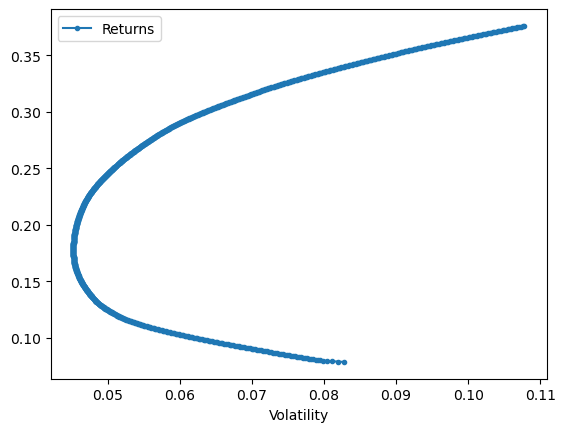

In [23]:
rk.plot_ef(1000, ret_portfolio['Returns'], cov)

In [32]:
#Calculating Portfolio retun
port_ret = rk.portfolio_return(ret_portfolio['Weights'],ret_portfolio['Returns'])
port_ret

0.2736945282577752

In [33]:
#Calculating Portfolio vol
port_vol = rk.portfolio_vol(ret_portfolio['Weights'],cov)
port_vol

0.05555907273269666

In [35]:
#Calculating Sharpe Ratio of portfolio
SR = (port_ret-(0.03))/port_vol
SR

4.386223820369131